
## Столбцы

### Люди

__Dt_Customer__ - дата регистрации клиента в компании  
__Recency__ - колличество дней с последней покупки  
__Complain__ - 1 если клиент жаловался в течении последних двух лет, в остальных случаях 0  

### Продукты

__MntWines__ - сумма, потраченная на вино за последние 2 года  
__MntFruits__ - на фрукты  
__MntMeatProducts__ - на мясо  
__MntFishProducts__ - на рыбу  
__MntSweetProducts__ - на сладкое  
__MntGoldProds__ - на золото  

### Promo

__NumDealsPurchases__ - кол-во покупок сделанных со скидкой  
__AcceptedCmp1__ - 1 если клиент принял участие в первой кампании, 0 в других случаях  
__AcceptedCmp2__ - во второй кампании  
__AcceptedCmp3__ - в третьей кампании  
__AcceptedCmp4__ - в четвертой кампании  
__AcceptedCmp5__ - в пятой кампании  
__Response__ - в последней кампании  

### Источник

__NumWebPurchases__ - кол-во покупок, сделанных через веб-сайт компании  
__NumCatalogPurchases__ - с помощью каталога  
__NumStorePurchases__ - в магазине  
__NumWebVisitsMonth__ - кол-во посещений сайта за последний месяц  

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import scipy.stats as st

In [2]:
df = pd.read_csv('marketing_campaign.csv', sep= '\t')
df = df[df['Income'] < 100000]
df = df[~df['Marital_Status'].isin(['Alone', 'Absurd', 'YOLO'])]
df = df.dropna()
df['age'] = 2023 - df['Year_Birth']

In [3]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,age
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,0,0,0,0,0,0,3,11,1,66
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,0,0,0,0,0,0,3,11,0,69
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,0,0,0,0,0,0,3,11,0,58
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,0,0,0,0,0,0,3,11,0,39
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,0,0,0,0,0,0,3,11,0,42


In [4]:
category_columns = ['Education', 'Marital_Status']

In [5]:
codding_values = pd.get_dummies(df[category_columns])

In [6]:
df_updated = pd.concat([df, codding_values], axis=1).drop(columns= ['ID', 'Marital_Status', 'Education', 'Dt_Customer'])

In [7]:
df_updated.head()

,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,Education_2n Cycle,Education_Basic,Education_Graduation,Education_Master,Education_PhD,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow
0,1957,58138.0,0,0,58,635,88,546,172,88,...,0,0,1,0,0,0,0,1,0,0
1,1954,46344.0,1,1,38,11,1,6,2,1,...,0,0,1,0,0,0,0,1,0,0
2,1965,71613.0,0,0,26,426,49,127,111,21,...,0,0,1,0,0,0,0,0,1,0
3,1984,26646.0,1,0,26,11,4,20,10,3,...,0,0,1,0,0,0,0,0,1,0
4,1981,58293.0,1,0,94,173,43,118,46,27,...,0,0,0,0,1,0,1,0,0,0


In [8]:
standard_scaler = StandardScaler()
standard_values = standard_scaler.fit_transform(df_updated)

In [9]:
df_standard = pd.DataFrame(standard_values, columns=df_updated.columns)

In [10]:
model = KMeans(6)
model.fit(standard_values)

KMeans(n_clusters=6)

In [11]:
df['cluster'] = model.labels_

In [12]:
df['cluster'].value_counts(normalize=True)

4    0.265027
1    0.223588
2    0.222678
3    0.189435
5    0.074681
0    0.024590
Name: cluster, dtype: float64

In [13]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,age,cluster
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,0,0,0,0,0,3,11,1,66,3
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,0,0,0,0,0,3,11,0,69,2
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,0,0,0,0,0,3,11,0,58,3
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,0,0,0,0,0,3,11,0,39,4
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,0,0,0,0,0,3,11,0,42,4


In [14]:
def plot_histogram(data, column, cluster_column):
    unique_cluster_array = np.sort(data[cluster_column].unique())
    f, ax = plt.subplots(1, unique_cluster_array.shape[0], figsize=(18, 4))
    plt.suptitle(f'Диаграмма распределения столбца {column} по кластерам')
    for i, elem in enumerate(unique_cluster_array):
        column_in_cluster = data[data[cluster_column] == elem][column]
        cluster_data = column_in_cluster.values
        ci = st.norm.interval(alpha=0.95, loc=np.mean(column_in_cluster.values), scale=st.sem(column_in_cluster.values))
        ax[i].hist(cluster_data)
        ax[i].set_xlabel(f'Кластер №{elem}\nMean - {round(column_in_cluster.mean())}\n\
Min - {round(column_in_cluster.min())}\n\
Max - {round(column_in_cluster.max())}\n\
Median - {round(column_in_cluster.median())}\n\
SD - {round(np.std(column_in_cluster.values))}\n\
Ci - ({round(ci[0])} - {round(ci[1])})\n')
        ax[i].vlines(column_in_cluster.mean(), 0, column_in_cluster.count() / 3, linestyle='dashed', color='red')

        
def plot_categorical(data, column, cluster_column):
    unique_cluster_array = np.sort(data[cluster_column].unique())
    print(f'Диаграмма распределения столбца {column} по кластерам')
    for elem in unique_cluster_array:
        tab_cluster_column = data[data[cluster_column] == elem][column].value_counts().reset_index()
        labels = tab_cluster_column['index'].values
        sizes = tab_cluster_column[column].values
        fig, ax1 = plt.subplots()
        ax1.pie(sizes, labels = labels, autopct='%1.1f%%')
        ax1.set_title(f'Кластер № {elem}')
        ax1.legend(title =f"{column}",
          loc ="center left",
          bbox_to_anchor =(1, 0.8))
        plt.show()

Диаграмма распределения столбца Marital_Status по кластерам


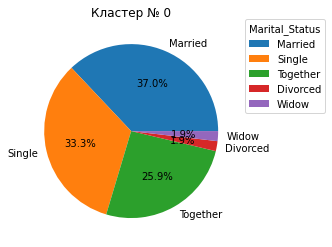

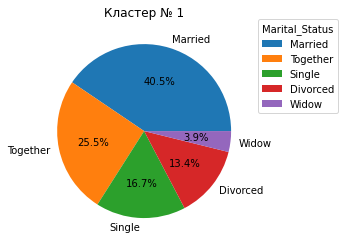

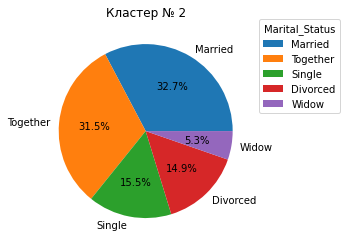

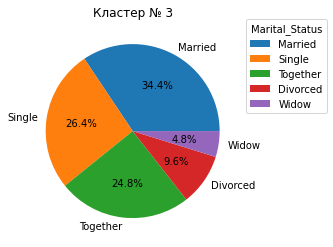

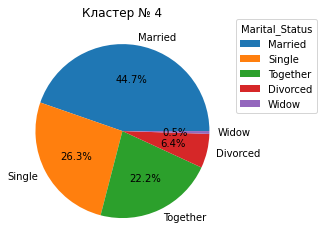

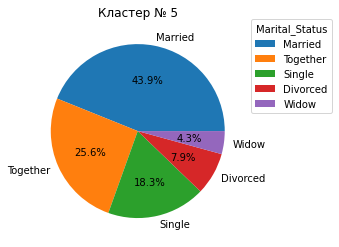

In [15]:
plot_categorical(df, 'Marital_Status', 'cluster')

Диаграмма распределения столбца Education по кластерам


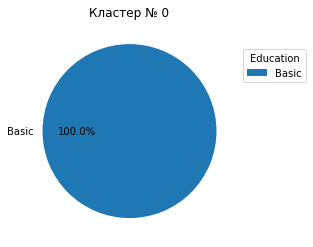

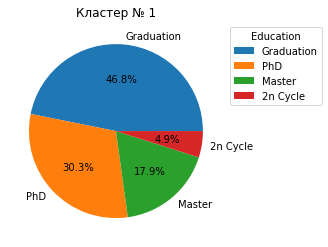

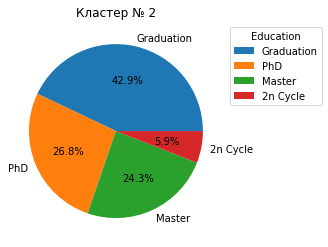

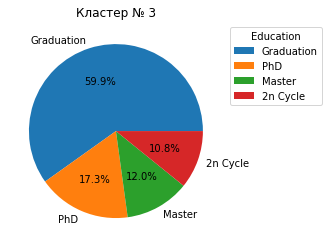

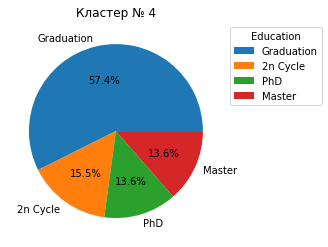

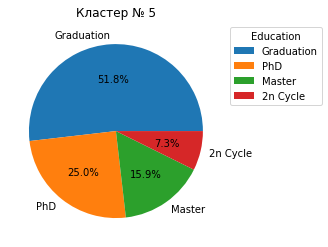

In [16]:
plot_categorical(df, 'Education', 'cluster')

Диаграмма распределения столбца Kidhome по кластерам


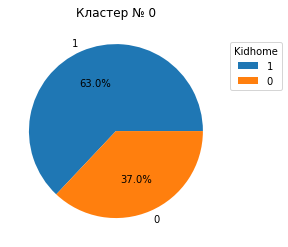

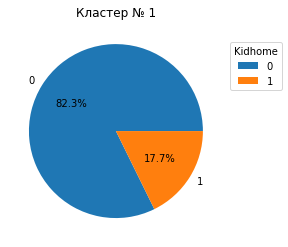

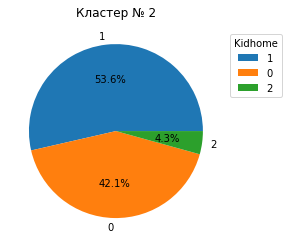

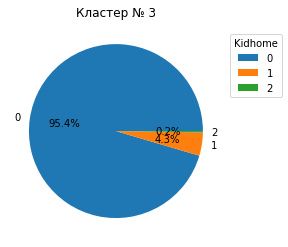

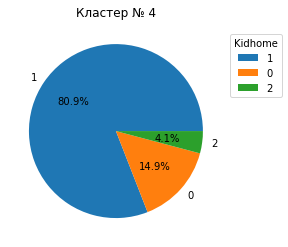

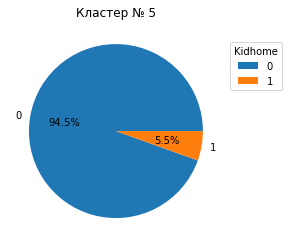

In [17]:
plot_categorical(df, 'Kidhome', 'cluster')

Диаграмма распределения столбца Teenhome по кластерам


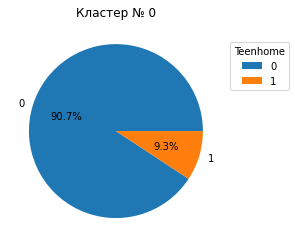

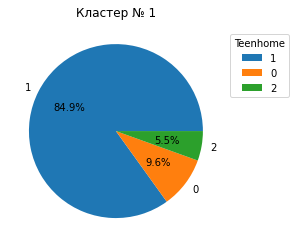

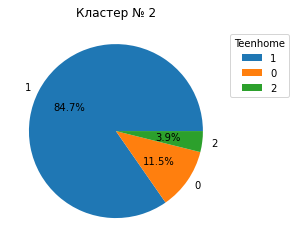

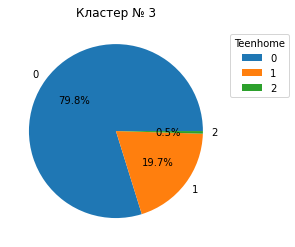

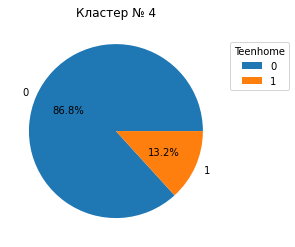

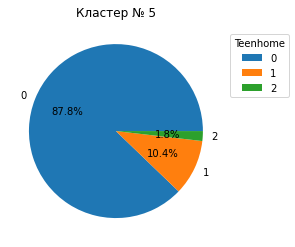

In [18]:
plot_categorical(df, 'Teenhome', 'cluster')

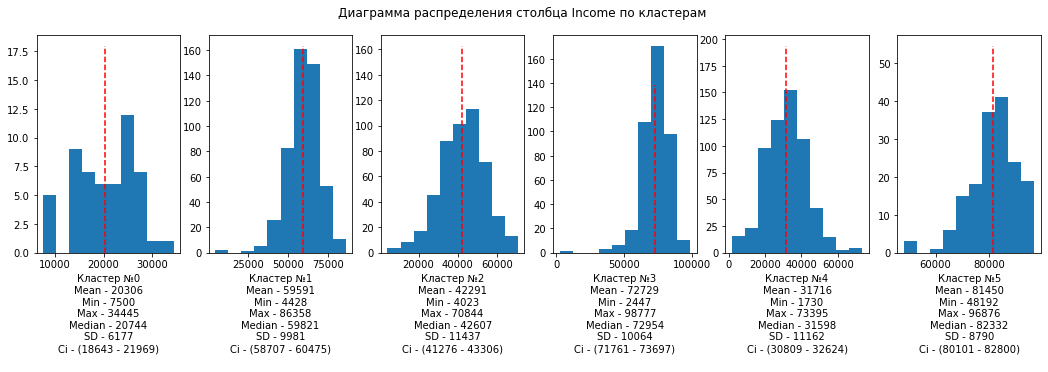

In [19]:
plot_histogram(df,'Income', 'cluster')

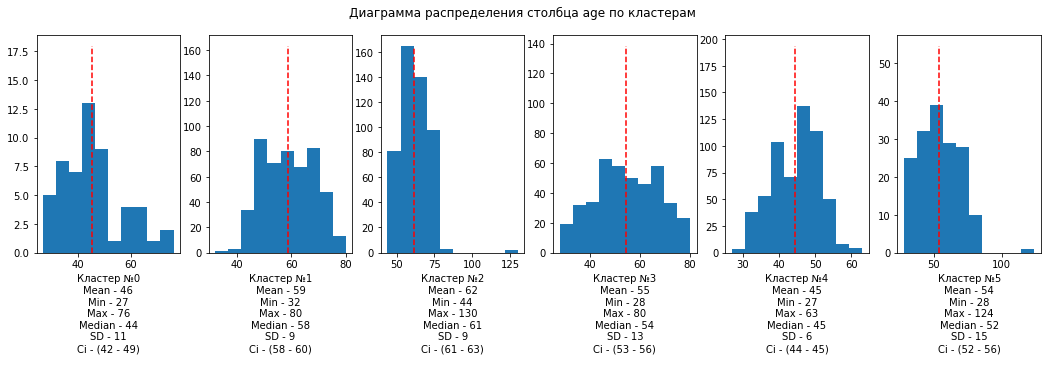

In [20]:
plot_histogram(df, 'age', 'cluster')

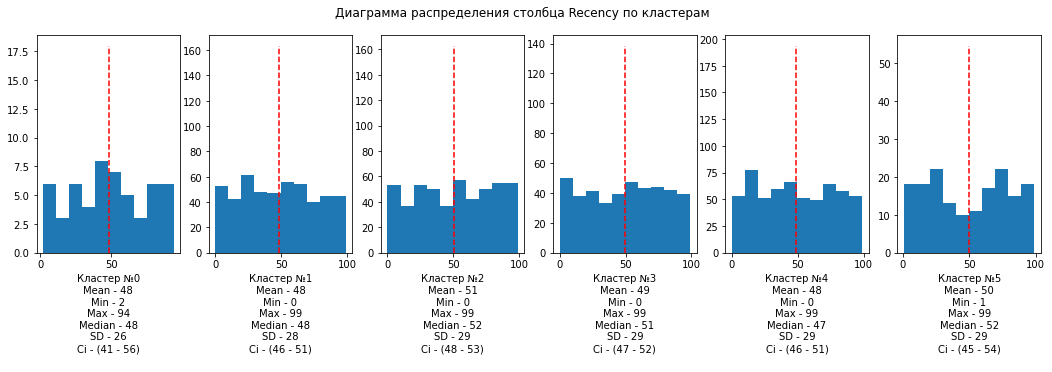

In [21]:
plot_histogram(df, 'Recency', 'cluster')

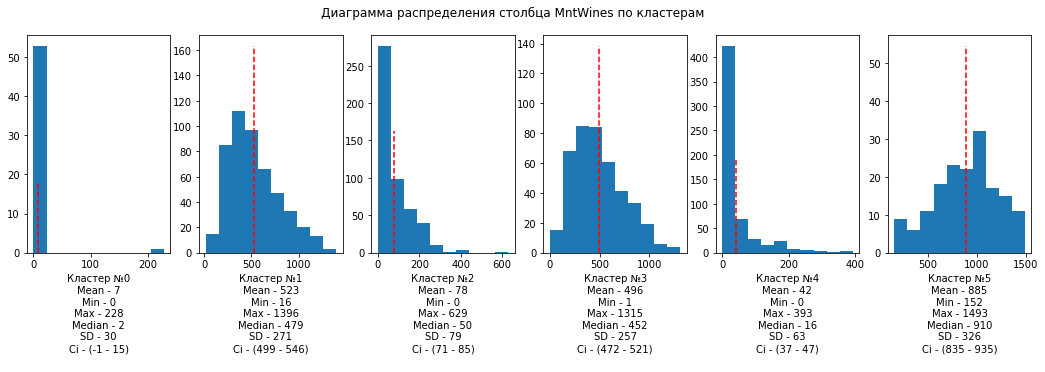

In [22]:
plot_histogram(df, 'MntWines', 'cluster')

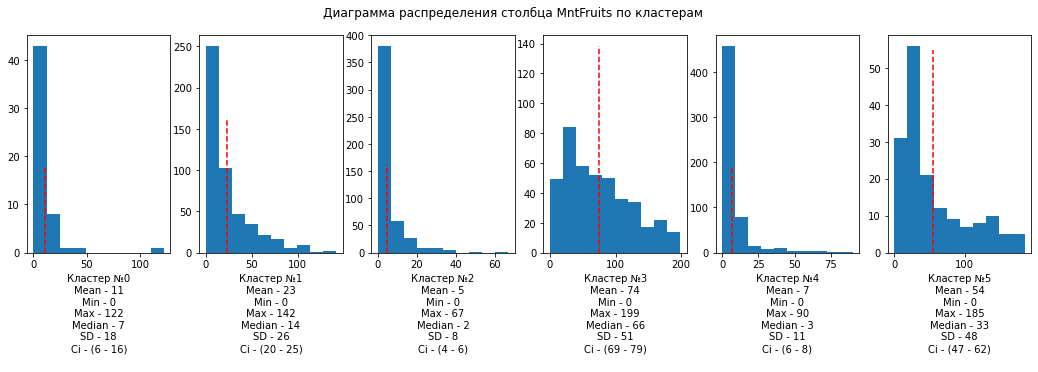

In [23]:
plot_histogram(df, 'MntFruits', 'cluster')

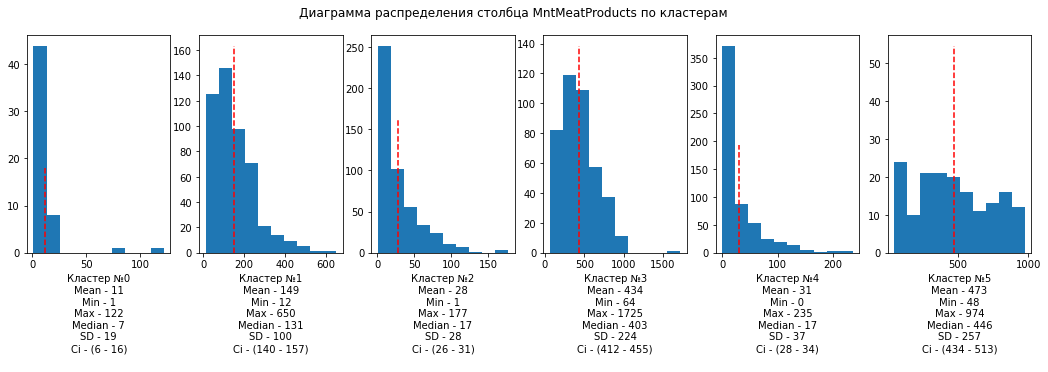

In [24]:
plot_histogram(df, 'MntMeatProducts', 'cluster')

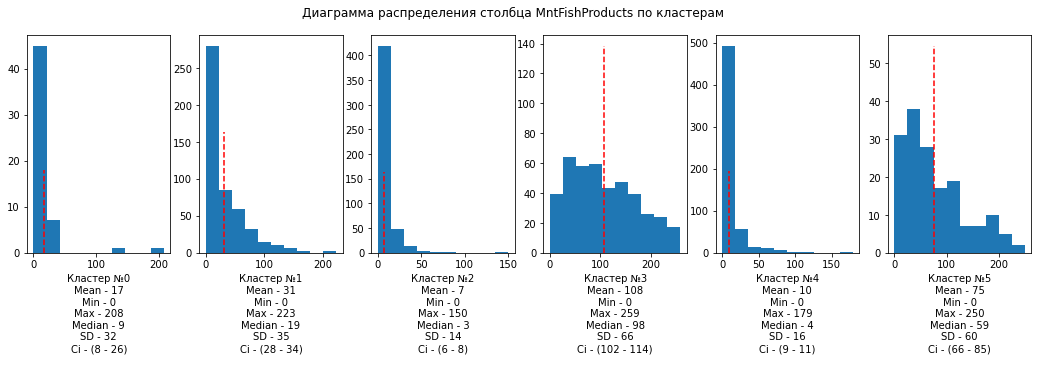

In [25]:
plot_histogram(df, 'MntFishProducts', 'cluster')

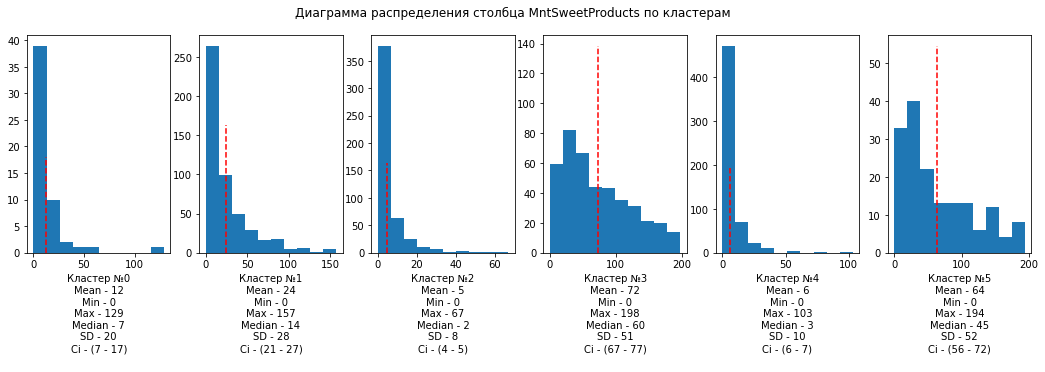

In [26]:
plot_histogram(df, 'MntSweetProducts', 'cluster')

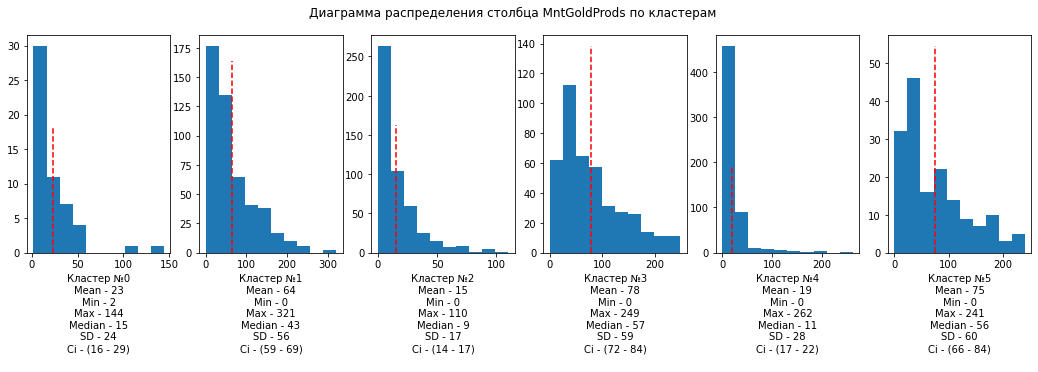

In [27]:
plot_histogram(df, 'MntGoldProds', 'cluster')

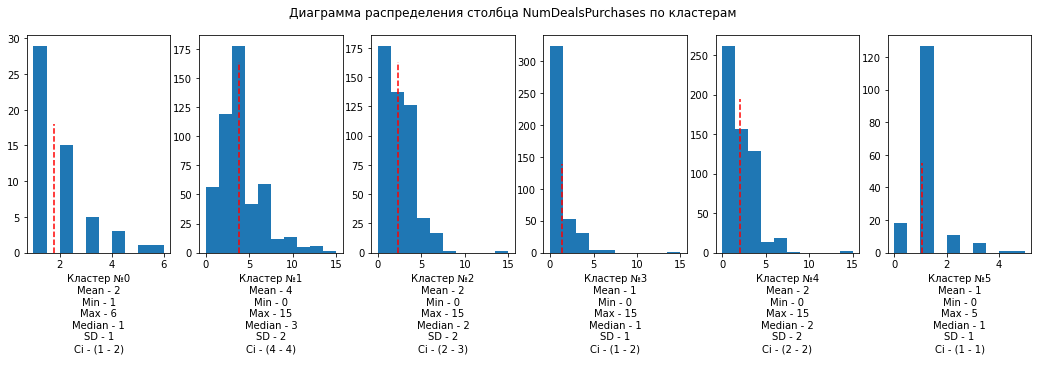

In [28]:
plot_histogram(df, 'NumDealsPurchases', 'cluster')

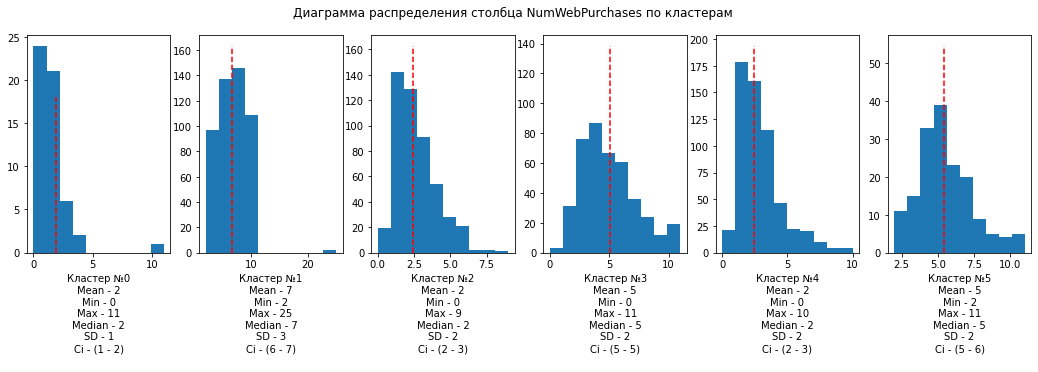

In [29]:
plot_histogram(df, 'NumWebPurchases', 'cluster')

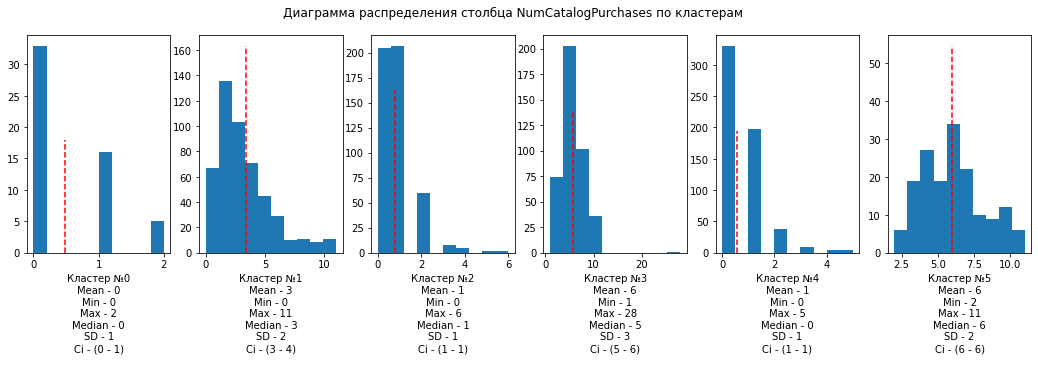

In [30]:
plot_histogram(df, 'NumCatalogPurchases', 'cluster')

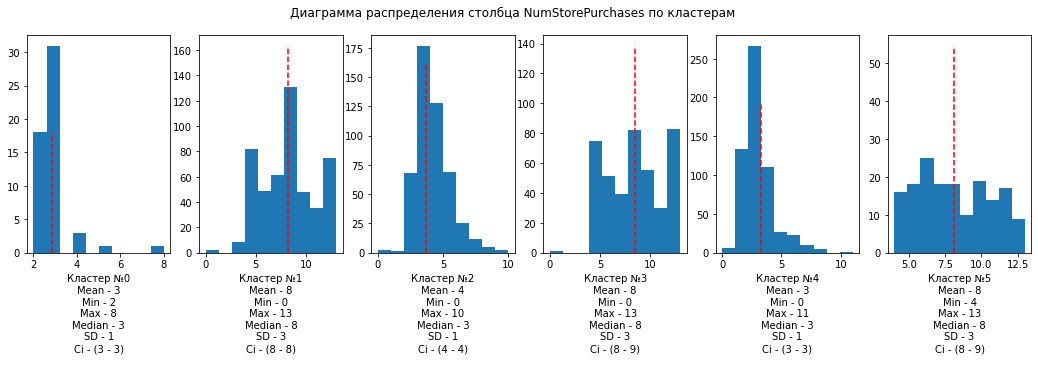

In [31]:
plot_histogram(df, 'NumStorePurchases', 'cluster')

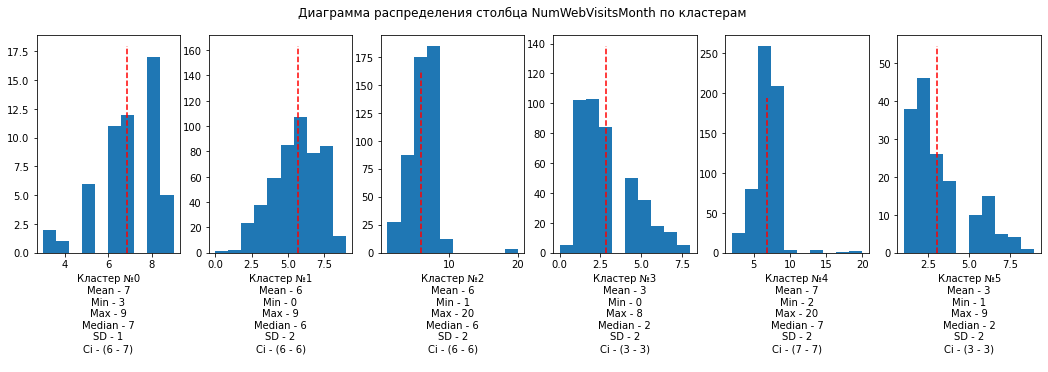

In [32]:
plot_histogram(df, 'NumWebVisitsMonth', 'cluster')

## Наблюдения из исследования 

Для исследования данного датасета было принято решение разбить его на 6 кластеров. Данные внутри этих кластеров распределились следующим образом:   
0 кластер - 2.4590%  
1 кластер - 22.3588%  
2 кластер - 22.2678%  
3 кластер - 18.9435%  
4 кластер - 26.5027%  
5 кластер - 7.4681%  

### Кластер 0 "Низкие расходы, самый низкий средний доход, один ребенок, базовое образование"

- _Семейное положение_: 37% - женатые, 33.3% - одинокие, 25.9% в отношениях, менее 4-х процентов занимают вдовцы/вдовы и разведенные
- _Образование_: абсолютно все клиенты нашего датасета с базовым образованием находятся в этом кластере, и занимают 100% этого кластера 
- _Количество детей_: у 63% есть один ребенок, у остальных детей нет
- _Количество подростков_: у 9.3% есть один подросток, у остальных нет ни одного
- _Доход_: данный кластер имеет наименьший доход из всех групп - средний 20300
- _Возраст_: средний - 46 лет
- _Дней с последней покупки_: средний - 48 дней  
- _Покупки со скидкой_: среднее количество - 2 покупки
- _Покупки совершенные через сайт_: среднее количество - 2 покупки
- _Покупки совершенные с помощью каталога_: абсолютное большинство не совершило ни одной покупки, но есть клиенты, которые совершили 1 или 2 покупки
- _Покупки совершенные в магазине_: среднее количество - 3 покупки
- _Количество посещений сайта за последний месяц_: среднее количество - 7 посещений  
__Расходы за посление 2 года:__
- _На вино_: медианное значение 2, среднее 7
- _На фрукты_: медианное значение 7, среднее 11
- _На мясо_: медианное значение 7, среднее 11
- _На рыбу_: медианное значение 9, среднее 17
- _На сладкое_: медианное значение 7, среднее 12
- _На золото_: медианное значение 15, среднее 23

### Кластер 1 "Женатые/в отношениях, один подросток, средние расходы"

- _Семейное положение_: 40.5% - женатые люди, 25.5% - в отношениях, 16.7% - одиноки, 13.4% - в разводе, 3.9% - вдовцы/вдовы
- _Образование_: 46.8% имеют высшее образование, 30.3% - докторская степень, 17.9% - магистр, два образования имеет 4.9% 
- _Количество детей_: у 17.7% есть один ребенок, у остальных детей нет
- _Количество подростков_: у 84.9% есть один подросток, у 5.5% два, у остальных нет ни одного
- _Доход_: средний доход - 59591
- _Возраст_: средний - 59 лет
- _Дней с последней покупки_: средний - 48 дней  
- _Покупки со скидкой_: среднее количество - 4 покупки
- _Покупки совершенные через сайт_: среднее количество - 7 покупок
- _Покупки совершенные с помощью каталога_: среднее количество - 3 покупки
- _Покупки совершенные в магазине_: среднее количество - 8 покупок
- _Количество посещений сайта за последний месяц_: среднее количество - 6 посещений  
__Расходы за посление 2 года:__
- _На вино_: медианное значение 479, среднее 523
- _На фрукты_: медианное значение 14, среднее 23
- _На мясо_: медианное значение 131, среднее 149
- _На рыбу_: медианное значение 19, среднее 31
- _На сладкое_: медианное значение 14, среднее 24
- _На золото_: медианное значение 43, среднее 64

### Кластер 2 "Женатые/в отношениях, один подросток, один ребенок, низкие расходы"

- _Семейное положение_: 32.7% - женатые люди, 31.5% - в отношениях, 15.5% - одиноки, 14.9% - в разводе, 5.3% - вдовцы/вдовы
- _Образование_: 42.9% имеют высшее образование, 26.8% - докторская степень, 24.3% - магистр, два образования имеет 5.9% 
- _Количество детей_: у 53.6% есть один ребенок, у 4.3% два, у остальных детей нет
- _Количество подростков_: у 84.7% есть один подросток, у 3.9% два, у остальных нет ни одного
- _Доход_: средний доход - 42291
- _Возраст_: средний - 62 года
- _Дней с последней покупки_: средний - 51 день 
- _Покупки со скидкой_: среднее количество - 2 покупки
- _Покупки совершенные через сайт_: среднее количество - 2 покупки
- _Покупки совершенные с помощью каталога_: среднее количество - 1 покупка
- _Покупки совершенные в магазине_: среднее количество - 4 покупки
- _Количество посещений сайта за последний месяц_: среднее количество - 6 посещений  
__Расходы за посление 2 года:__
- _На вино_: медианное значение 50, среднее 78
- _На фрукты_: медианное значение 2, среднее 5
- _На мясо_: медианное значение 17, среднее 28
- _На рыбу_: медианное значение 3, среднее 7
- _На сладкое_: медианное значение 2, среднее 5
- _На золото_: медианное значение 9, среднее 15

### Кластер 3 "Без детей, высокие доходы, высокие расходы"

- _Семейное положение_: 34.4% - женатые люди, 24.8% - в отношениях, 26.4% - одиноки, 9.6% - в разводе, 4.8% - вдовцы/вдовы
- _Образование_: 59.9% имеют высшее образование, 17.3% - докторская степень, 12% - магистр, два образования имеет 10.8% 
- _Количество детей_: у 4.3% есть один ребенок, у 0.2% два, у остальных детей нет
- _Количество подростков_: у 19.7% есть один подросток, у 0.5% два, у остальных нет ни одного
- _Доход_: средний доход - 72729
- _Возраст_: средний - 55 лет
- _Дней с последней покупки_: средний - 49 дней  
- _Покупки со скидкой_: среднее количество - 1 покупка
- _Покупки совершенные через сайт_: среднее количество - 5 покупок
- _Покупки совершенные с помощью каталога_: среднее количество - 6 покупок
- _Покупки совершенные в магазине_: среднее количество - 8 покупок
- _Количество посещений сайта за последний месяц_: среднее количество - 3 посещения  
__Расходы за посление 2 года:__
- _На вино_: медианное значение 452, среднее 496
- _На фрукты_: медианное значение 66, среднее 74
- _На мясо_: медианное значение 403, среднее 434
- _На рыбу_: медианное значение 98, среднее 108
- _На сладкое_: медианное значение 60, среднее 72
- _На золото_: медианное значение 57, среднее 78

### Кластер 4 "Женаты/в отношениях, низкие доходы, низкие расходы, один ребенок"

- _Семейное положение_: 44.7% - женатые люди, 22.2% - в отношениях, 26.3% - одиноки, 6.4% - в разводе, 0.5% - вдовцы/вдовы
- _Образование_: 57.4% имеют высшее образование, 13.6% - докторская степень, 13.6% - магистр, два образования имеет 15.5% 
- _Количество детей_: у 80.9% есть один ребенок, у 4.1% два, у остальных детей нет
- _Количество подростков_: у 13.2% есть один подросток, у остальных нет ни одного
- _Доход_: средний доход - 31716
- _Возраст_: средний - 45 лет
- _Дней с последней покупки_: средний - 48 дней  
- _Покупки со скидкой_: среднее количество - 2 покупки
- _Покупки совершенные через сайт_: среднее количество - 2 покупки
- _Покупки совершенные с помощью каталога_: среднее количество - 1 покупка
- _Покупки совершенные в магазине_: среднее количество - 3 покупки
- _Количество посещений сайта за последний месяц_: среднее количество - 7 посещений  
__Расходы за посление 2 года:__
- _На вино_: медианное значение 16, среднее 42
- _На фрукты_: медианное значение 3, среднее 7
- _На мясо_: медианное значение 17, среднее 31
- _На рыбу_: медианное значение 4, среднее 10
- _На сладкое_: медианное значение 3, среднее 6
- _На золото_: медианное значение 11, среднее 19

### Кластер 5 "Женаты/в отношениях, без детей, самые высокие доходы, самые высокие расходы"

- _Семейное положение_: 43.9% - женатые люди, 25.6% - в отношениях, 18.3% - одиноки, 7.9% - в разводе, 4.3% - вдовцы/вдовы
- _Образование_: 51.8% имеют высшее образование, 25% - докторская степень, 15.9% - магистр, два образования имеет 7.3% 
- _Количество детей_: у 5.5% есть один ребенок, у остальных детей нет
- _Количество подростков_: у 10.4% есть один подросток, у 1.8% два, у остальных нет ни одного
- _Доход_: средний доход - 81450
- _Возраст_: средний - 54 года
- _Дней с последней покупки_: средний - 50 дней  
- _Покупки со скидкой_: среднее количество - 1 покупка
- _Покупки совершенные через сайт_: среднее количество - 5 покупок
- _Покупки совершенные с помощью каталога_: среднее количество - 6 покупок
- _Покупки совершенные в магазине_: среднее количество - 8 покупок
- _Количество посещений сайта за последний месяц_: среднее количество - 3 посещения  
__Расходы за посление 2 года:__
- _На вино_: медианное значение 910, среднее 885
- _На фрукты_: медианное значение 33, среднее 54
- _На мясо_: медианное значение 446, среднее 473
- _На рыбу_: медианное значение 59, среднее 75
- _На сладкое_: медианное значение 45, среднее 64
- _На золото_: медианное значение 56, среднее 75